<span style="font-weight:bolder;text-transform: uppercase; font-size:15px; color:#0772BC; border: 2px solid #0772BC; padding: 5px;">DETECTION DU DEEP LEARNING A L'AIDE DU DEEP LEARNING CNN (Reseau de neurone convolutionnel)</span>

# Importation des librairies

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

# Importation de la Data 

- Covid_19
- normal

In [2]:
train_dir = "./data_covid_train"

num_covid = len(os.listdir(os.path.join(train_dir, 'covid_19')))
num_normal = len(os.listdir(os.path.join(train_dir, 'normal')))

print(f"COVID_19={num_covid}")
print(f"NORMAL={num_normal}")

data_length = num_covid + num_normal

print(f"DATA SIZE={data_length}")




COVID_19=204
NORMAL=204
DATA SIZE=408


## Normal 

In [3]:
NORMAL = os.listdir(train_dir+"/normal")
NORMAL_dir = train_dir+"/normal"

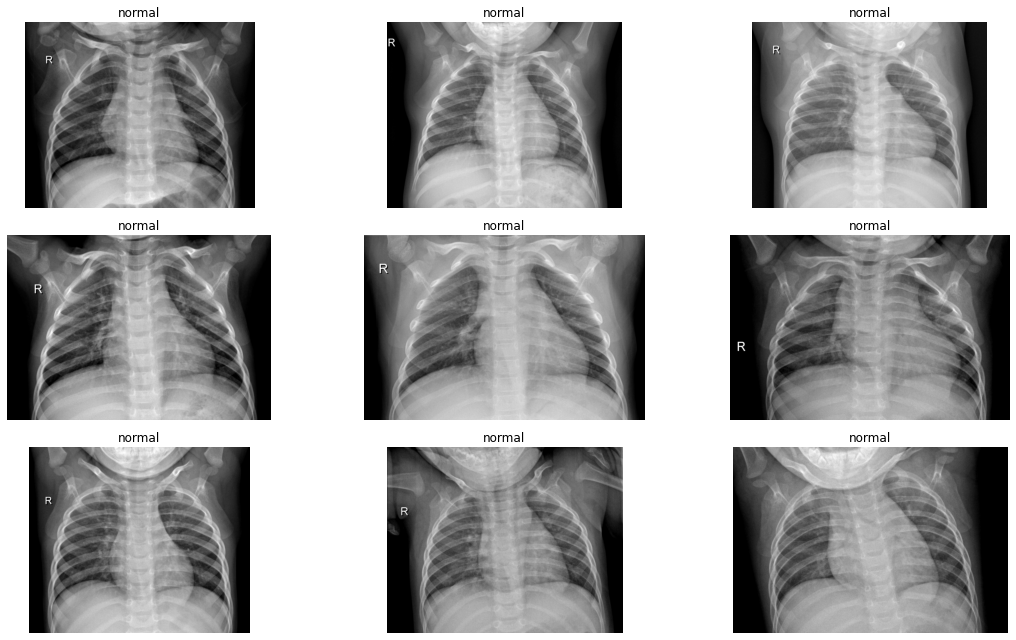

In [4]:
plt.figure(figsize=(16, 9))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(NORMAL_dir, NORMAL[i]))
    plt.title("normal")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    

plt.tight_layout()

## Covid_19

In [5]:
COVID = os.listdir(train_dir+"/covid_19")
COVID_dir = train_dir+"/covid_19"

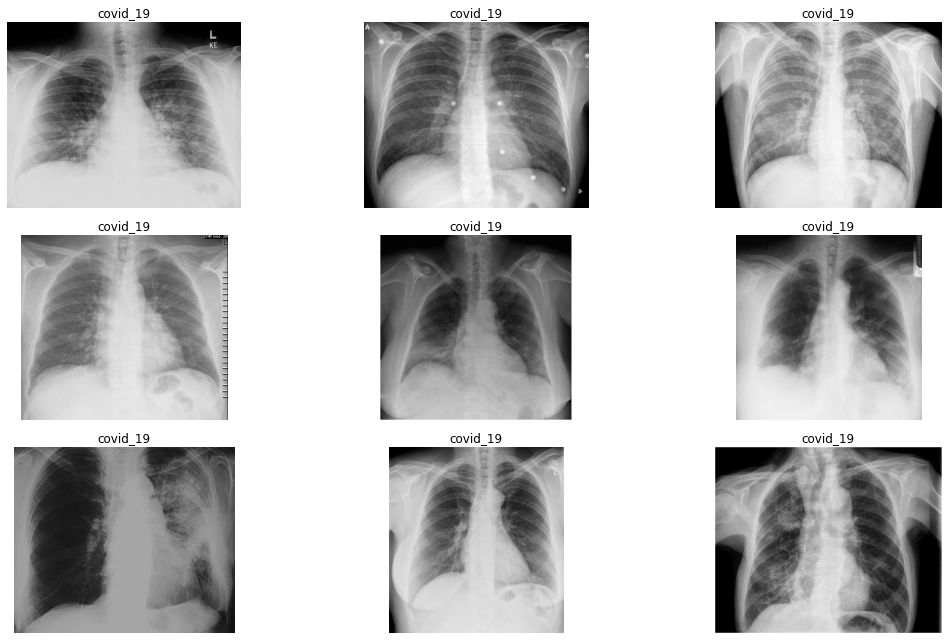

In [6]:
plt.figure(figsize=(16, 9))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(COVID_dir, COVID[i]))
    plt.title("covid_19")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    

plt.tight_layout()

# Formation du DATASET (Covid_19 + Normal)

In [7]:
data = []
labels = []
imagePaths = []


In [8]:
for i in range(int(data_length/2)):

    img_covid_19 = COVID_dir+"/"+COVID[i]

    img_normal = NORMAL_dir+"/"+NORMAL[i]

    imagePaths.append(img_normal)
    imagePaths.append(img_covid_19)


In [9]:
imagePaths

['./data_covid_train/normal/IM-0117-0001.jpeg',
 './data_covid_train/covid_19/000001-1.jpg',
 './data_covid_train/normal/IM-0119-0001.jpeg',
 './data_covid_train/covid_19/000001-1.png',
 './data_covid_train/normal/IM-0122-0001.jpeg',
 './data_covid_train/covid_19/000001-10.jpg',
 './data_covid_train/normal/IM-0125-0001.jpeg',
 './data_covid_train/covid_19/000001-11.jpg',
 './data_covid_train/normal/IM-0127-0001.jpeg',
 './data_covid_train/covid_19/000001-12.jpg',
 './data_covid_train/normal/IM-0128-0001.jpeg',
 './data_covid_train/covid_19/000001-13.jpg',
 './data_covid_train/normal/IM-0129-0001.jpeg',
 './data_covid_train/covid_19/000001-14.jpg',
 './data_covid_train/normal/IM-0131-0001.jpeg',
 './data_covid_train/covid_19/000001-15.jpg',
 './data_covid_train/normal/IM-0133-0001.jpeg',
 './data_covid_train/covid_19/000001-17.jpg',
 './data_covid_train/normal/IM-0135-0001.jpeg',
 './data_covid_train/covid_19/000001-18.jpg',
 './data_covid_train/normal/IM-0137-0001.jpeg',
 './data_covid

In [10]:
print("Nombre d'image total est  : {}".format(len(imagePaths)))

Nombre d'image total est  : 408


## Formation de la variable Target et de Features

In [11]:
for imagePath in imagePaths:

    # Extraire le label à partir du nom du dossier

    label = imagePath.split("/")[-2]

    # Convertir et Redimensionner en 224x224 pixels

    image = cv2.imread(imagePath)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image = cv2.resize(image, (224, 224))

    data.append(image)

    labels.append(label)

### Labels

In [12]:
labels

['normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'covid_19',
 'normal',
 'cov

### Features

In [13]:
data[0]

array([[[14, 14, 14],
        [24, 24, 24],
        [25, 25, 25],
        ...,
        [30, 30, 30],
        [22, 22, 22],
        [19, 19, 19]],

       [[17, 17, 17],
        [21, 21, 21],
        [27, 27, 27],
        ...,
        [28, 28, 28],
        [20, 20, 20],
        [18, 18, 18]],

       [[16, 16, 16],
        [23, 23, 23],
        [29, 29, 29],
        ...,
        [28, 28, 28],
        [24, 24, 24],
        [16, 16, 16]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

## Conversion en Array et Mise à l'échelle entre [0,1]

In [14]:
# Mettre la data à l'echelle pour que toutes la data soit comprise entre [0,1] et convertir en Tableau Numpy
data = np.array(data) / 255.0


# Convertir les labels en Tableau Numpy
labels = np.array(labels)

In [15]:
labels

array(['normal', 'covid_19', 'normal', 'covid_19', 'normal', 'covid_19',
       'normal', 'covid_19', 'normal', 'covid_19', 'normal', 'covid_19',
       'normal', 'covid_19', 'normal', 'covid_19', 'normal', 'covid_19',
       'normal', 'covid_19', 'normal', 'covid_19', 'normal', 'covid_19',
       'normal', 'covid_19', 'normal', 'covid_19', 'normal', 'covid_19',
       'normal', 'covid_19', 'normal', 'covid_19', 'normal', 'covid_19',
       'normal', 'covid_19', 'normal', 'covid_19', 'normal', 'covid_19',
       'normal', 'covid_19', 'normal', 'covid_19', 'normal', 'covid_19',
       'normal', 'covid_19', 'normal', 'covid_19', 'normal', 'covid_19',
       'normal', 'covid_19', 'normal', 'covid_19', 'normal', 'covid_19',
       'normal', 'covid_19', 'normal', 'covid_19', 'normal', 'covid_19',
       'normal', 'covid_19', 'normal', 'covid_19', 'normal', 'covid_19',
       'normal', 'covid_19', 'normal', 'covid_19', 'normal', 'covid_19',
       'normal', 'covid_19', 'normal', 'covid_19', 

In [16]:
data

array([[[[0.05490196, 0.05490196, 0.05490196],
         [0.09411765, 0.09411765, 0.09411765],
         [0.09803922, 0.09803922, 0.09803922],
         ...,
         [0.11764706, 0.11764706, 0.11764706],
         [0.08627451, 0.08627451, 0.08627451],
         [0.0745098 , 0.0745098 , 0.0745098 ]],

        [[0.06666667, 0.06666667, 0.06666667],
         [0.08235294, 0.08235294, 0.08235294],
         [0.10588235, 0.10588235, 0.10588235],
         ...,
         [0.10980392, 0.10980392, 0.10980392],
         [0.07843137, 0.07843137, 0.07843137],
         [0.07058824, 0.07058824, 0.07058824]],

        [[0.0627451 , 0.0627451 , 0.0627451 ],
         [0.09019608, 0.09019608, 0.09019608],
         [0.11372549, 0.11372549, 0.11372549],
         ...,
         [0.10980392, 0.10980392, 0.10980392],
         [0.09411765, 0.09411765, 0.09411765],
         [0.0627451 , 0.0627451 , 0.0627451 ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

## Encoder La variabre Labels ("Normal", "covid_19") => (1,0)

In [17]:
#Label encodeur pour convertir les labels en Entier

lb = LabelBinarizer()

labels = lb.fit_transform(labels)

labels = to_categorical(labels)

In [18]:
lb.classes_

array(['covid_19', 'normal'], dtype='<U8')

In [19]:
labels

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

# Separation de notre DASASET en Train et Test

In [20]:
# Spliter notre data en train et en test
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [21]:
print('testX shape:', trainX.shape)
print(trainX.shape[0], 'train samples')
print(testX.shape[0], 'test samples')

testX shape: (326, 224, 224, 3)
326 train samples
82 test samples


# Initialisation de notre ImageDataGenerator

In [22]:
# Initialiser notre augmenteur d'image

trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")

# Formation de notre model de base (VGG16) : Transfer learning

In [23]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# Construction de notre Couche personnalisé

In [24]:
# Construction du model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel) 
headModel = Dense(2, activation="softmax")(headModel)

In [25]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [26]:
for layer in baseModel.layers:
	layer.trainable = False

# Parametre d'apprentissage

In [27]:
INIT_LR = 1e-3
EPOCHS = 18
BS = 64

# Compilation du model

In [28]:
print("[INFO] lancement du model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] lancement du model...


C:\Users\DELL\anaconda3\envs\covid_19\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Entrainement de notre DataSet

In [29]:
print("[INFO] Entrainement du model...")
H = model.fit(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] Entrainement du model...
Epoch 1/18
5/5 [==============================] - 65s 14s/step - loss: 0.7372 - accuracy: 0.4962 - val_loss: 0.6255 - val_accuracy: 0.6585
Epoch 2/18
5/5 [==============================] - 75s 15s/step - loss: 0.6122 - accuracy: 0.7250 - val_loss: 0.5513 - val_accuracy: 0.9878
Epoch 3/18
5/5 [==============================] - 64s 13s/step - loss: 0.5530 - accuracy: 0.7824 - val_loss: 0.4922 - val_accuracy: 0.9268
Epoch 4/18
5/5 [==============================] - 75s 15s/step - loss: 0.5042 - accuracy: 0.8031 - val_loss: 0.4498 - val_accuracy: 0.8659
Epoch 5/18
5/5 [==============================] - 66s 16s/step - loss: 0.4506 - accuracy: 0.8817 - val_loss: 0.3931 - val_accuracy: 0.9756
Epoch 6/18
5/5 [==============================] - 65s 13s/step - loss: 0.3916 - accuracy: 0.9084 - val_loss: 0.3533 - val_accuracy: 0.9756
Epoch 7/18
5/5 [==============================] - 65s 13s/step - loss: 0.3450 - accuracy: 0.9504 - val_loss: 0.3210 - val_accuracy: 0.

# Evaluation du model

In [30]:
# Prediction sur les test
print("[INFO] evaluation du model...")
predIdxs = model.predict(testX, batch_size=BS)

[INFO] evaluation du model...


In [31]:
predIdxs

array([[2.32274775e-04, 9.99767721e-01],
       [2.07220088e-03, 9.97927785e-01],
       [9.99625921e-01, 3.74001451e-04],
       [1.95472930e-02, 9.80452657e-01],
       [9.98823345e-01, 1.17659057e-03],
       [4.24743071e-02, 9.57525730e-01],
       [1.20783166e-03, 9.98792231e-01],
       [9.92661238e-01, 7.33875064e-03],
       [9.95267749e-01, 4.73227538e-03],
       [5.95631776e-03, 9.94043648e-01],
       [2.49849330e-03, 9.97501552e-01],
       [9.99799430e-01, 2.00572278e-04],
       [7.37082243e-01, 2.62917668e-01],
       [8.36412306e-04, 9.99163628e-01],
       [9.56807196e-01, 4.31927815e-02],
       [7.85452664e-01, 2.14547306e-01],
       [3.90508492e-03, 9.96094882e-01],
       [9.64960158e-01, 3.50398235e-02],
       [1.68379594e-03, 9.98316169e-01],
       [1.21499947e-03, 9.98784959e-01],
       [9.99934077e-01, 6.59306970e-05],
       [6.55906856e-01, 3.44093174e-01],
       [9.97943699e-01, 2.05631554e-03],
       [9.98380423e-01, 1.61960186e-03],
       [6.298508

In [32]:
# Pour chaque image de l'ensemble de test, nous devons trouver l'index de l'étiquette avec la plus grande probabilité prédite correspondante.
# l'étiquette avec la plus grande probabilité prédite correspondante
predIdxs = np.argmax(predIdxs, axis=1)

In [33]:
predIdxs

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [34]:
# Rapport de classification
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

              precision    recall  f1-score   support

    covid_19       1.00      0.95      0.97        41
      normal       0.95      1.00      0.98        41

    accuracy                           0.98        82
   macro avg       0.98      0.98      0.98        82
weighted avg       0.98      0.98      0.98        82



# Matrice de confusion

In [35]:
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# Matrice de confusion
print(cm)
print("acc: {:.4f}".format(acc))

[[39  2]
 [ 0 41]]
acc: 0.9756


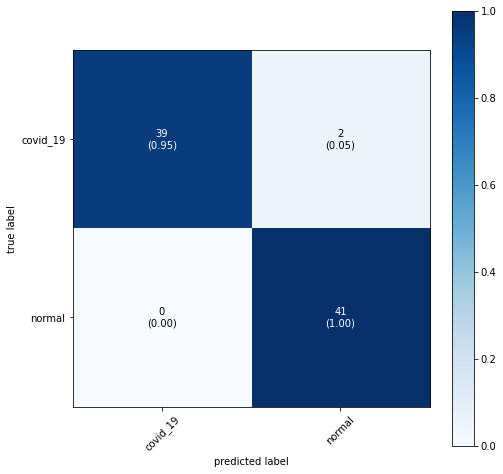

In [36]:
from mlxtend.plotting import plot_confusion_matrix

class_names = list(range(0, 10))
fig, ax = plot_confusion_matrix(
    conf_mat=cm,colorbar=True,
    show_absolute=True, 
    show_normed=True,
    class_names=lb.classes_,
    figsize=(8, 8))

# Courbe d'apprentissage

Text(0, 0.5, 'Loss/Accuracy')

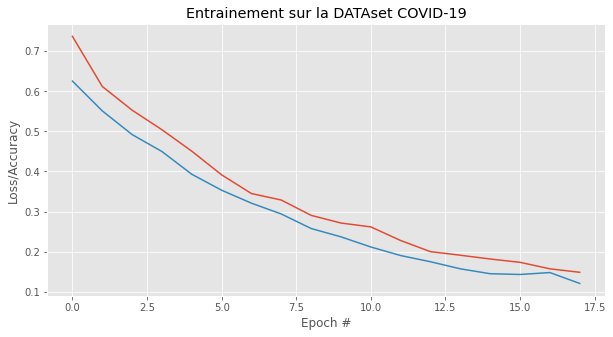

In [37]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
# plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
# plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")

plt.title("Entrainement sur la DATAset COVID-19")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")


Text(0.5, 0, 'Epoch #')

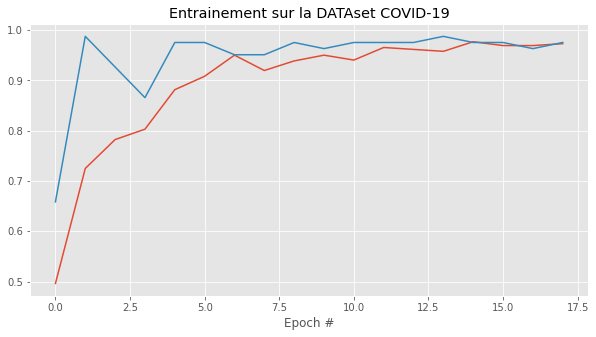

In [38]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure(figsize=(10,5))

plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")

plt.title("Entrainement sur la DATAset COVID-19")
plt.xlabel("Epoch #")

[INFO] Enregistrer le COVID-19 ...


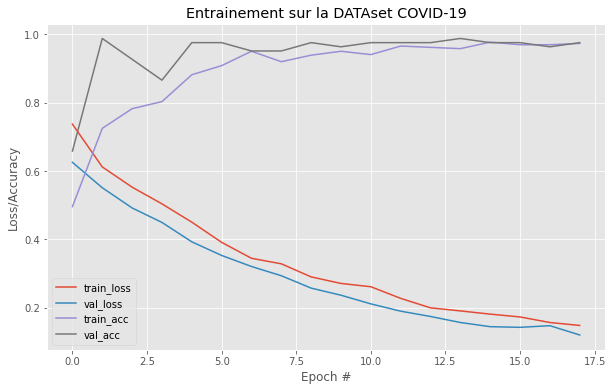

In [43]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")

plt.title("Entrainement sur la DATAset COVID-19")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")

plt.legend(loc="lower left")
plt.savefig("plot.png")

# Generer le model
print("[INFO] Enregistrer le COVID-19 ...")
model.save("covid19.model", save_format="h5")


In [2]:
imagepath1 = "./data_test/IM-0117-0001.jpeg"
imagepath2 = "./data_test/5f001e0b.jpg"
imagepath3 = "./data_test/IM-0387-0001.jpeg"

# Test de notre Model

In [7]:
from tensorflow import keras
import cv2
import os

import matplotlib.pyplot as plt
import numpy as np

BS=64


In [8]:

model_covid_19 = keras.models.load_model("covid19.model")


def predict_img(imagepath_param):

    reponse = ""
    color = ""
    data_ = []

    image = cv2.imread(imagepath_param)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image = cv2.resize(image, (224, 224))

    data_.append(image)
    data_ = np.array(data_) / 255.0

    predIdxs_prob = model_covid_19.predict(data_, batch_size=BS)
    predIdxs_ = np.argmax(predIdxs_prob, axis=1)
    
    if(predIdxs_[0]==0):
        reponse = "Covid_19"
        color= "red"
    else:
        reponse = "Normal"
        color= "green"



    plt.figure(figsize=(12, 5))

    img = plt.imread(imagepath_param)
    plt.title("{} avec un pourcentage de : {} %".format(reponse,round(predIdxs_prob[0][predIdxs_[0]]*100,2)),color=color)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()

    return True

True

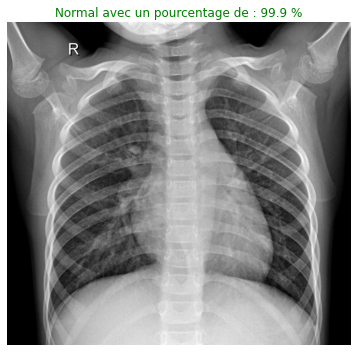

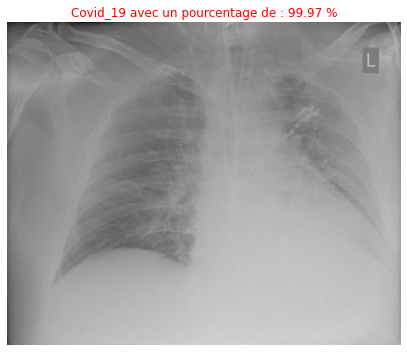

In [9]:
predict_img(imagepath3)
predict_img(imagepath2)

In [19]:
test = "./data_test"
data_test = os.listdir(test)
data_test_dir = test

<Figure size 1152x648 with 0 Axes>

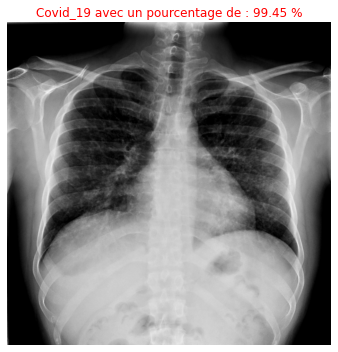

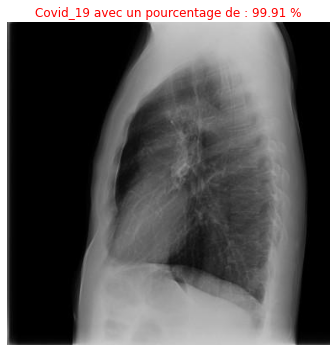

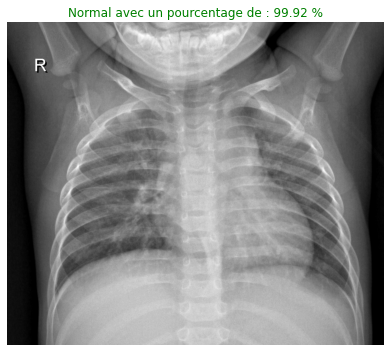

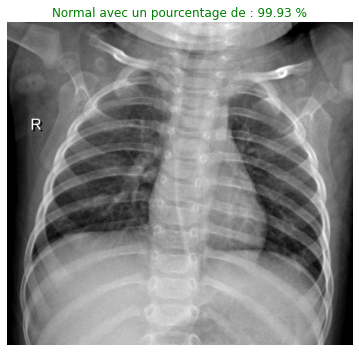

In [20]:
plt.figure(figsize=(16, 9))

for i in range(4):
    
    predict_img(os.path.join(data_test_dir, data_test[i]))
    

plt.tight_layout()